In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter


In [2]:
clicks = [{'x': 277, 'y': 253}, {'x': 277, 'y': 253}, {'x': 277, 'y': 253}, {'x': 75, 'y': 436}, {'x': 455, 'y': 278}, {'x': 189, 'y': 126}, {'x': 189, 'y': 126}, {'x': 189, 'y': 126}, {'x': 336, 'y': 263}, {'x': 986, 'y': 284}, {'x': 892, 'y': 383}, {'x': 1041, 'y': 313}, {'x': 961, 'y': 395}, {'x': 770, 'y': 436}, {'x': 658, 'y': 385}, {'x': 507, 'y': 440}, {'x': 393, 'y': 365}, {'x': 317, 'y': 336}, {'x': 235, 'y': 245}, {'x': 112, 'y': 206}, {'x': 252, 'y': 189}, {'x': 292, 'y': 376}, {'x': 178, 'y': 517}, {'x': 148, 'y': 619}, {'x': 312, 'y': 724}, {'x': 485, 'y': 585}, {'x': 419, 'y': 667}, {'x': 538, 'y': 668}, {'x': 503, 'y': 609}, {'x': 634, 'y': 663}, {'x': 659, 'y': 605}, {'x': 740, 'y': 688}, {'x': 768, 'y': 519}, {'x': 875, 'y': 457}, {'x': 912, 'y': 395}, {'x': 938, 'y': 380}, {'x': 964, 'y': 363}, {'x': 988, 'y': 344}, {'x': 1011, 'y': 332}, {'x': 1011, 'y': 332}, {'x': 1142, 'y': 311}, {'x': 1169, 'y': 272}, {'x': 1220, 'y': 254}, {'x': 1303, 'y': 200}, {'x': 1327, 'y': 199}, {'x': 1329, 'y': 331}, {'x': 1316, 'y': 420}, {'x': 550, 'y': 288}]

maxX = 0
maxY = 0
for click in clicks:
    if click["x"] > maxX:
        maxX = click["x"]
    if click["y"] > maxY:
        maxY = click["y"]

# print(maxX, maxY)
frame = np.zeros((maxX,maxY))

for click in clicks:
    # print(click['x'], click['y'])
    frame[click['x']-1][click['y']-1] += 1
frame = frame.transpose()
frame = gaussian_filter(frame, sigma=25)

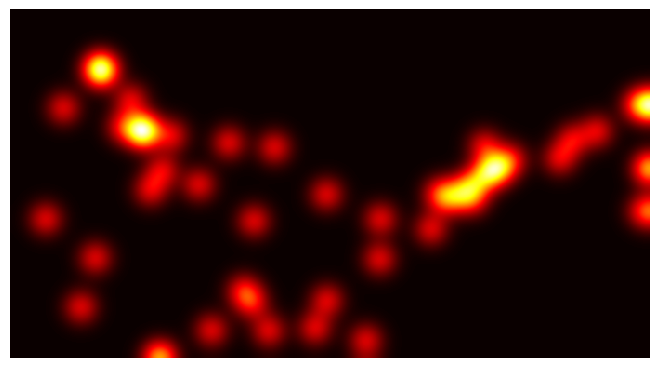

In [3]:
plt.figure()
plt.imshow(frame, cmap='hot', interpolation='nearest')
# plt.colorbar()
plt.axis("off")
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.savefig("heatmap.png",bbox_inches='tight')
plt.show()

In [13]:
from PIL import Image, ImageChops
def trim(im):
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    if bbox:
        return im.crop(bbox)
    else: 
        # Failed to find the borders, convert to "RGB"        
        return trim(im.convert('RGB'))
img = Image.open("heatmap.png")
img2= trim(img)
img2.save("heatmap.png")

In [4]:
from PIL import Image

img1 = Image.open("screen.png")
img2 = Image.open("heatmap.png")

img1 = img1.resize(img2.size)

blended_image = Image.blend(img1, img2, alpha=0.5)
blended_image.show()